#### 1.Perform pre-processing on the full dataset here: https://www.kaggle.com/sohier/calcofi 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import plotly.express as px
from scipy import signal
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
bottle_df = pd.read_csv("../week13repo/bottle.csv", dtype=str)
bottle_df

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.5,33.44,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.44,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.42,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,34404,864859,093.4 026.4,20-1611SR-MX-310-2239-09340264-0000A-7,0,18.744,33.4083,5.805,23.87055,108.74,...,0.18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864859,34404,864860,093.4 026.4,20-1611SR-MX-310-2239-09340264-0002A-3,2,18.744,33.4083,5.805,23.87072,108.74,...,0.18,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864860,34404,864861,093.4 026.4,20-1611SR-MX-310-2239-09340264-0005A-3,5,18.692,33.415,5.796,23.88911,108.46,...,0.18,5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864861,34404,864862,093.4 026.4,20-1611SR-MX-310-2239-09340264-0010A-3,10,18.161,33.4062,5.816,24.01426,107.74,...,0.31,10,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
bottle_df.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_?mol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')

In [4]:
print(bottle_df.dtypes)

Cst_Cnt                object
Btl_Cnt                object
Sta_ID                 object
Depth_ID               object
Depthm                 object
                        ...  
TA1                    object
TA2                    object
pH2                    object
pH1                    object
DIC Quality Comment    object
Length: 74, dtype: object


In [5]:
bottle_df['T_degC'] = bottle_df['T_degC'].astype(float)    

In [6]:
print(bottle_df['T_degC'].dtypes)

float64


In [7]:
bottle_df[ 'Salnty'] = bottle_df[ 'Salnty'].astype(float)

In [8]:
print(bottle_df['Salnty'].dtypes)

float64


In [9]:
print(bottle_df['STheta'].dtypes)

object


In [10]:
bottle_df.describe()

,T_degC,Salnty
count,853900.000000,817509.000000
mean,10.799677,33.840350
std,4.243825,0.461843
min,1.440000,28.431000
25%,7.680000,33.488000
50%,10.060000,33.863000
75%,13.880000,34.196900
max,31.140000,37.034000


In [11]:
bottle_df.shape

(864863, 74)

#### Step 2: Variable Selection and Data Cleaning
Select the predictors to be used in the model though any of the techniques such as Correlation, Summary fuction of a regression model to find variable importance, Principle Component Analysis, Feature Importance. I’ve chosen the predictors: Salnty and STheta and would be the input to my model.

#### step 1: import data


In [12]:
new_bottle_vs = pd.DataFrame(bottle_df[['T_degC', 'Salnty', 'STheta']])
new_bottle_vs.head()

,T_degC,Salnty,STheta
0,10.50,33.440,25.649
1,10.46,33.440,25.656
2,10.46,33.437,25.654
3,10.45,33.420,25.643
4,10.45,33.421,25.643


In [13]:
#remove NA's
new_bottle_vs.dropna(inplace=True)

In [14]:
new_bottle_vs.shape

(812174, 3)

#### Step 3: Exploratory Data Analysis

In [15]:
new_bottle_vs.describe()

,T_degC,Salnty
count,812174.000000,812174.000000
mean,10.847904,33.842424
std,4.221005,0.461567
min,1.440000,28.431000
25%,7.750000,33.490000
50%,10.100000,33.869200
75%,13.910000,34.198000
max,31.140000,37.034000


In [16]:
new_bottle_vs.corr()

,T_degC,Salnty
T_degC,1.000000,-0.504227
Salnty,-0.504227,1.000000


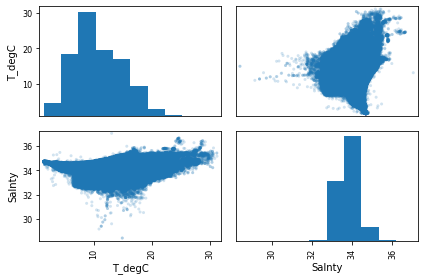

In [17]:
from pandas.plotting import scatter_matrix
bottle_df=pd.DataFrame(new_bottle_vs, columns=['T_degC', 'Salnty', 'STheta'])
axes = scatter_matrix(bottle_df, alpha=0.2)
plt.tight_layout()

Pairs plot is one best out there for explanatory analysis. From the pairs plot, we infer that Salnty and Stheta has a perfect possitive relationship, as Salnty increases, soil water content increases, weheras water Temperature and Salnty has a perfect negative relationship, as the content of salt increases, water temperature decreases. Similarly, Stheta and T_degC has a negative relationship.


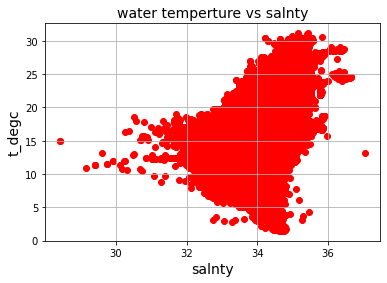

In [22]:
#2d plot water temperture vs salnty
plt.scatter(new_bottle_vs['Salnty'], new_bottle_vs['T_degC'], color='red')
plt.title('water temperture vs salnty', fontsize=14)
plt.xlabel('salnty', fontsize=14)
plt.ylabel('t_degc', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
#2d plot water temperture vs moisture content
plt.scatter(new_bottle_vs['STheta'], new_bottle_vs['T_degC'], color='red')
plt.title('water temperture vs moisture content', fontsize=14)
plt.xlabel('STheta', fontsize=14)
plt.ylabel('t_degc', fontsize=14)
plt.grid(True)
plt.show()

#### 2.Perform feature selection (decide what columns should be included in your analysis). How did you figure out what features were important?

In [ ]:
# f-test feature selection for numerical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot
 
# load the dataset
def load_dataset(filename):
# load the dataset as a pandas DataFrame
#data = read_csv(filename, header=None)
# retrieve numpy array
    dataset = new_bottle_vs.values
# split into input (X) and output (y) variables
    x = dataset[:, :-1]
    y = dataset[:,-1]
    return x, y
 
# feature selection
def select_features(x_train, y_train, x_test):
# configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
    fs.fit(x_train, y_train)
# transform train input data
    x_train_fs = fs.transform(x_train)
# transform test input data
    x_test_fs = fs.transform(x_test)
    return x_train_fs, x_test_fs, fs

# load the dataset
x, y = load_dataset('new_bottle_vs1.csv')
# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
# feature selection
x_train_fs, x_test_fs, fs = select_features(x_train, y_train, x_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

#### 3.Perform multiple linear regression on the dataset. Be sure to display the final resulting equation with the coefficients and intercept in markdown. 

#### Linear regression

In [41]:
from sklearn.model_selection import train_test_split
import numpy as np

In [42]:
new_bottle_vs.fillna(method='ffill', inplace=True)

In [43]:
x = new_bottle_vs[['Salnty']]
y = new_bottle_vs['T_degC']
print('salinity is :', x)
print('temperature is :',y)

salinity is :          Salnty
0       33.4400
1       33.4400
2       33.4370
3       33.4200
4       33.4210
...         ...
864858  33.4083
864859  33.4083
864860  33.4150
864861  33.4062
864862  33.3880

[812174 rows x 1 columns]
temperature is : 0         10.500
1         10.460
2         10.460
3         10.450
4         10.450
           ...  
864858    18.744
864859    18.744
864860    18.692
864861    18.161
864862    17.533
Name: T_degC, Length: 812174, dtype: float64


#### Splitting our data into test and train

In [44]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=5)

In [45]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(649739, 1)
(162435, 1)
(649739,)
(162435,)


#### Evaluating Model

In [46]:
x = np.array(new_bottle_vs['Salnty']).reshape(-1,1)
y = np.array(new_bottle_vs['T_degC']).reshape(-1,1)

#### Splitting data in to test and train sets

In [47]:
from sklearn.linear_model import LinearRegression

regression_df = LinearRegression()
regression_df.fit(x_train, y_train)

LinearRegression()

In [48]:
y_pred = regression_df.predict(x_test)
y_pred

array([11.59949405, 14.6078886 , 12.19932732, ..., 12.06090426,
        8.96945588, 10.30754547])

In [49]:
from sklearn.metrics import mean_squared_error,r2_score
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print("Root mean square error Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))

Root mean square error Score for Test set: 3.6
R2 Score for Test set: 0.25


In [50]:
accuracy_score = regression_df.score(x_test, y_test)
print(accuracy_score)

0.2541382091103057


In [51]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.2541382091103057

#### Multiple linear regression

In [52]:
x = new_bottle_vs[['Salnty', 'STheta']]
y = new_bottle_vs['T_degC']

from sklearn.linear_model import LinearRegression

#define multiple linear regression model
regression_df = LinearRegression()
#fit the multiple linear regression model
regression_df.fit(x,y)
#predict with data
y_pred = regression_df.predict(x)
y_pred



array([11.37864643, 11.35776   , 11.36389399, ..., 16.63115101,
       16.25821965, 15.8453498 ])

#### polynomial regression 

#### Training Polynomial regression model with entire data

In [53]:
from sklearn.preprocessing import PolynomialFeatures

In [54]:
poly_reg = PolynomialFeatures(degree=2,interaction_only=False)

In [55]:
x_poly=poly_reg.fit_transform(x_test)

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
lreg = LinearRegression()

In [58]:
x_poly

array([[1.00000000e+00, 3.36800000e+01, 1.13434240e+03],
       [1.00000000e+00, 3.30280000e+01, 1.09084878e+03],
       [1.00000000e+00, 3.35500000e+01, 1.12560250e+03],
       ...,
       [1.00000000e+00, 3.35800000e+01, 1.12761640e+03],
       [1.00000000e+00, 3.42500000e+01, 1.17306250e+03],
       [1.00000000e+00, 3.39600000e+01, 1.15328160e+03]])

In [59]:
lreg.fit(x_poly, y_test)

LinearRegression()

In [60]:
y_pred=lreg.predict(poly_reg.transform(x))

ValueError: X shape does not match training shape

In [61]:
accuracy = lreg.score(poly_reg.transform(x), y)
accuracy

ValueError: X shape does not match training shape

#### 4.Which regression approach had the “best” performance? Be sure to compare it to what you did last week.

In [ ]:
multilinear is more better than linear regression.